<a href="https://colab.research.google.com/github/nguyenvuong1309/Learn-machine-learning/blob/main/algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.youtube.com/watch?v=i_LwzRVP7bg&list=PLWKjhJtqVAblStefaz_YOVpDWqcRScc2s
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Link dataset [link text](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)

In [2]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("/content/drive/MyDrive/Colab/dataset/magic04.data",names=cols)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
df["class"] = (df["class"] == "g").astype(int)
df["class"]

0        1
1        1
2        1
3        1
4        1
        ..
19015    0
19016    0
19017    0
19018    0
19019    0
Name: class, Length: 19020, dtype: int64

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


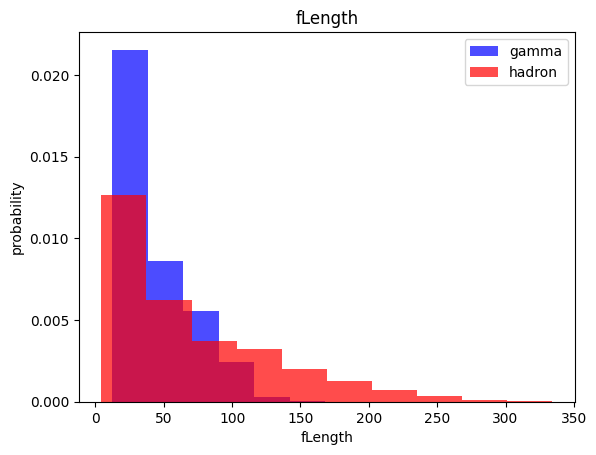

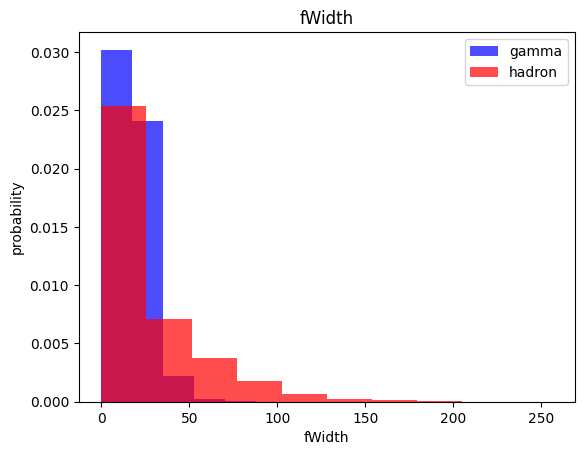

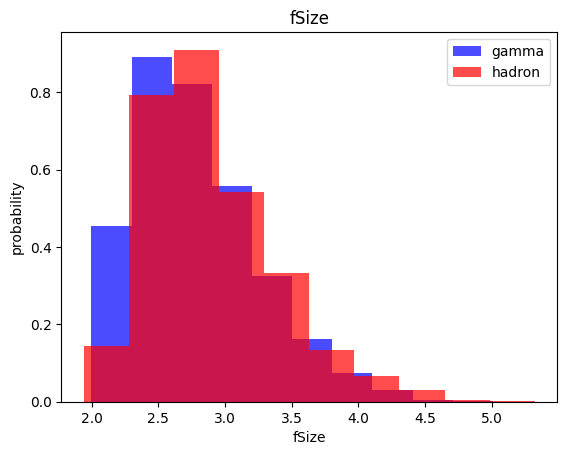

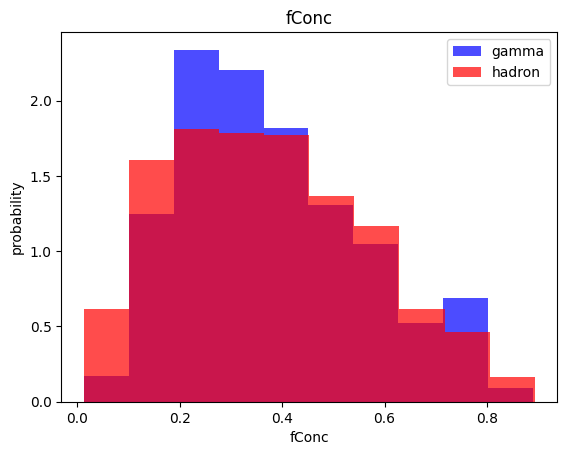

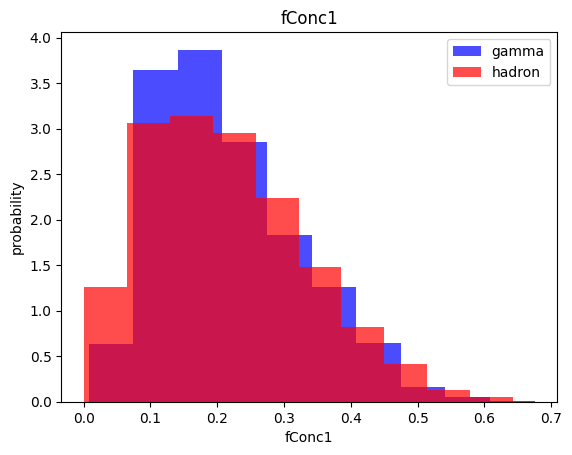

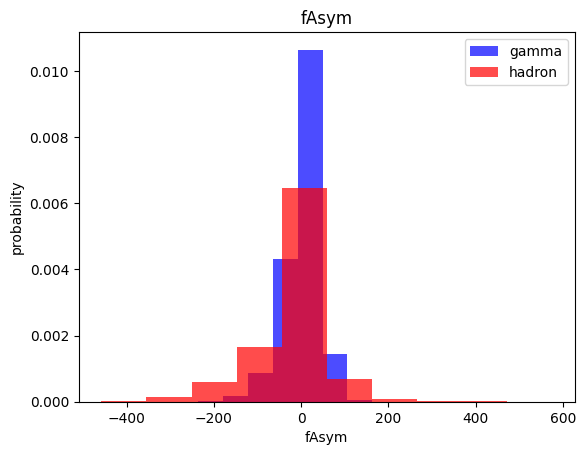

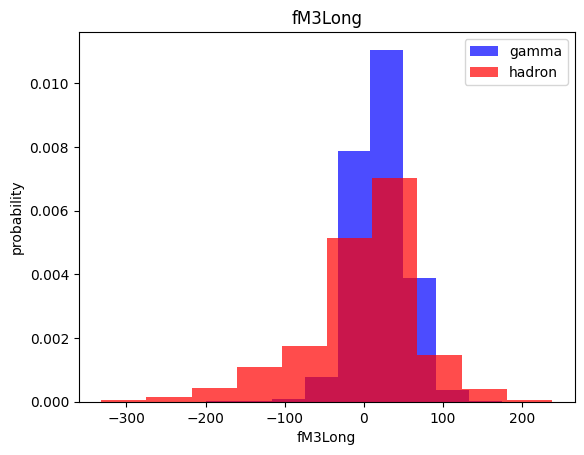

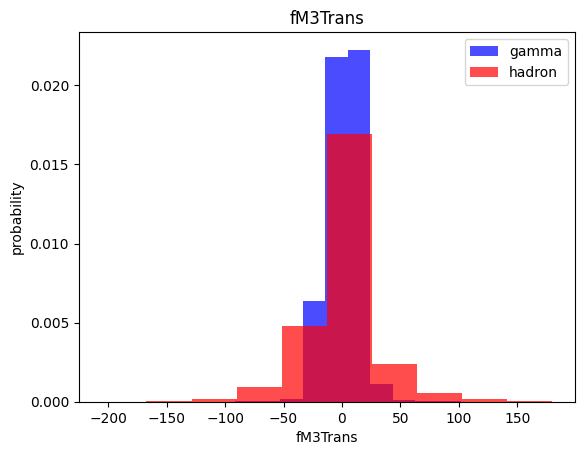

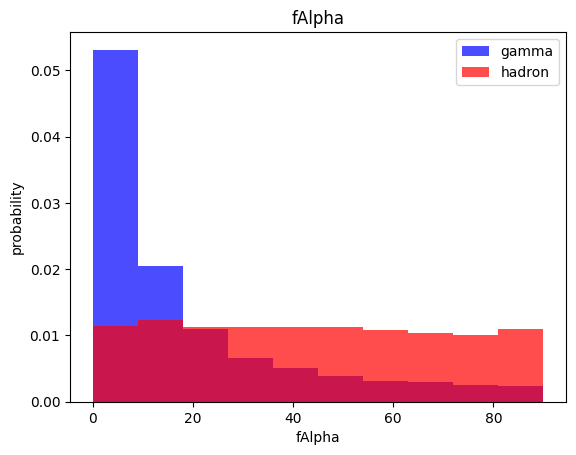

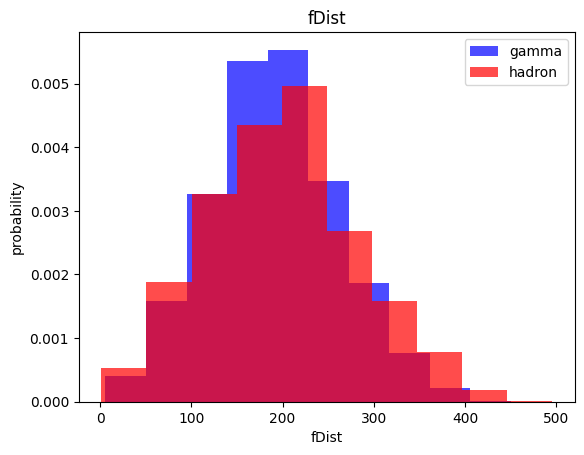

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color = 'blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color = 'red' , label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation, test datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6 * len(df)),int(0.8 * len(df))])

In [7]:
def scale_dataset(dataframe,oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.hstack((X,np.reshape(y,(-1,1))))
  return data, X, y

In [8]:
train, X_train, y_train = scale_dataset(train,oversample=True)
valid, X_valid, y_valid = scale_dataset(valid,oversample=False)
test, X_test, y_test = scale_dataset(test,oversample=False)

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [10]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train )

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1361
           1       0.84      0.85      0.85      2443

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.79      3804
weighted avg       0.80      0.80      0.80      3804



# Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [15]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1361
           1       0.84      0.82      0.83      2443

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# SVM

In [16]:
from sklearn.svm import SVC
from sklearn import svm

In [17]:
svm_model = svm.SVC()
svm_model = svm_model.fit(X_train, y_train)

In [18]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1361
           1       0.89      0.90      0.90      2443

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804



# NEURAL NETWORK

In [19]:
import tensorflow as tf

In [20]:
def plot_history(history):
  fig, (ax1,ax2) =plt.subplots(1,2,figsize=(10, 4))

  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)
  plt.subplots_adjust(bottom=0.1, right=1 , top=0.9)
  #ax1.show()

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)
  #ax2.show()

In [21]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='relu'),
          tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid'),
        ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])

  history = nn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)

  return nn_model, history

In [22]:
print(X_train.shape)
print(y_train.shape)

(14852, 10)
(14852,)


16 nodes, dropout 0, lr 0.01, batch size 32
119/119 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.8502
0.3555620610713959
inf
16 nodes, dropout 0, lr 0.01, batch size 64
119/119 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8483
0.36266565322875977
0.3555620610713959
16 nodes, dropout 0, lr 0.01, batch size 128
119/119 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8220
0.389146625995636
0.3555620610713959
16 nodes, dropout 0, lr 0.005, batch size 32
119/119 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8502
0.3633294999599457
0.3555620610713959
16 nodes, dropout 0, lr 0.005, batch size 64
119/119 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8289
0.3868604898452759
0.3555620610713959
16 nodes, dropout 0, lr 0.005, batch size 128
119/119 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8215
0.39199796319007874
0.

<ipython-input-20-f218c856b134>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1,ax2) =plt.subplots(1,2,figsize=(10, 4))


119/119 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8509
0.3631783127784729
0.3427450358867645
32 nodes, dropout 0, lr 0.005, batch size 32
119/119 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8436
0.3540093004703522
0.3427450358867645
32 nodes, dropout 0, lr 0.005, batch size 64
119/119 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8328
0.36968183517456055
0.3427450358867645
32 nodes, dropout 0, lr 0.005, batch size 128
119/119 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8396
0.3634960949420929
0.3427450358867645
32 nodes, dropout 0, lr 0.001, batch size 32
119/119 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8346
0.3916470408439636
0.3427450358867645
32 nodes, dropout 0, lr 0.001, batch size 64
119/119 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8084
0.4137592315673828
0.3427450358867645
32 nodes, d

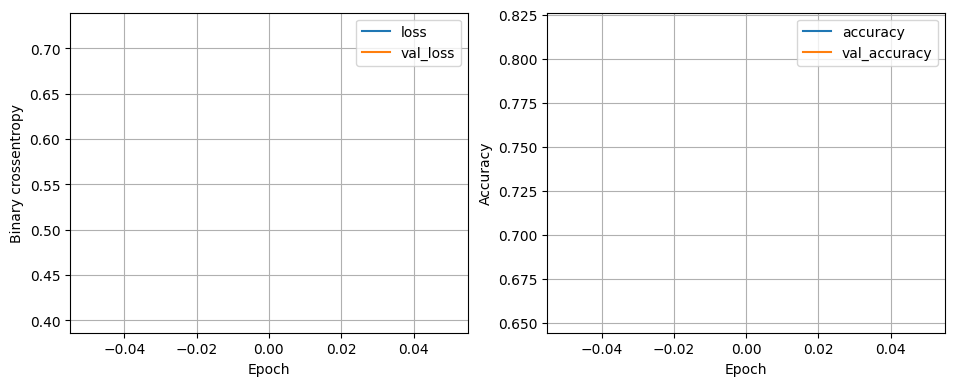

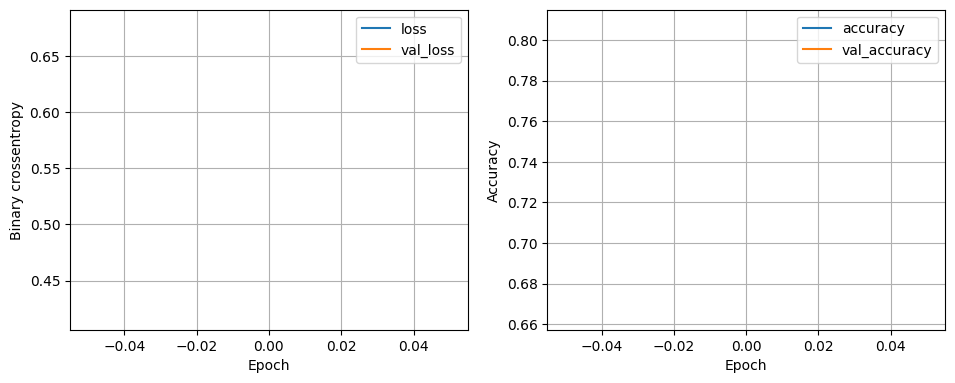

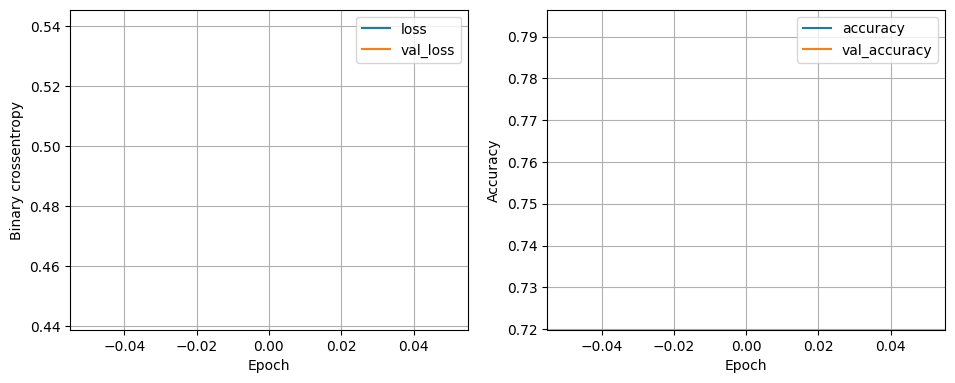

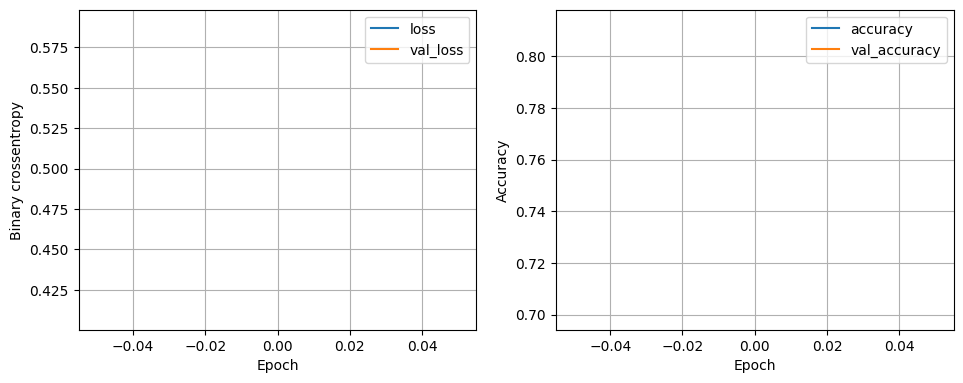

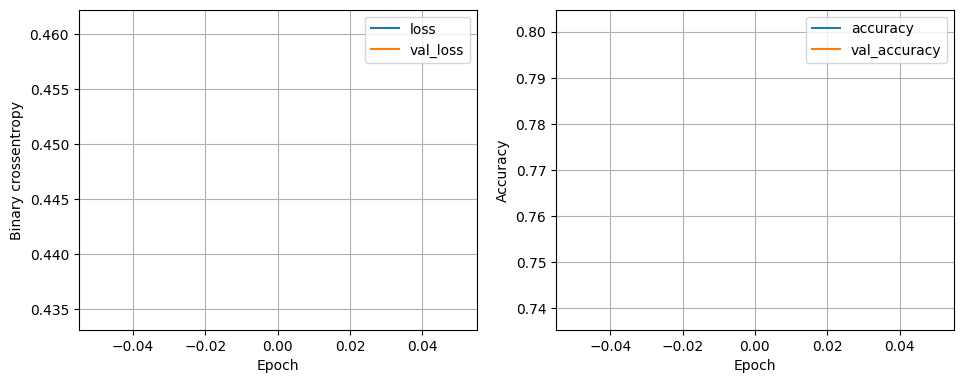

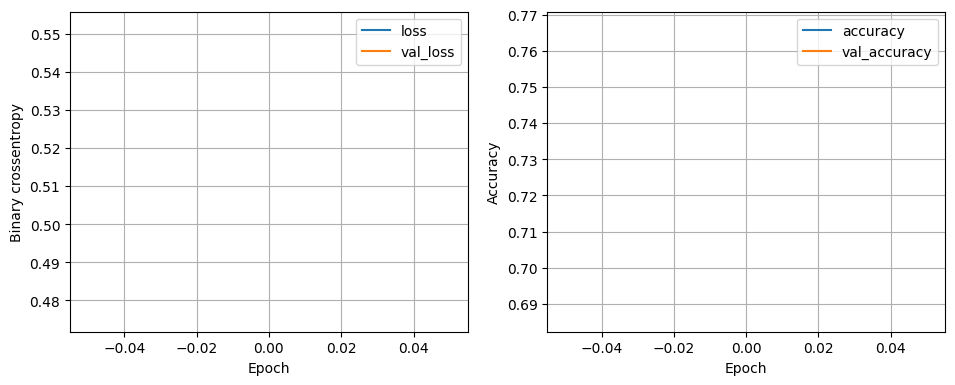

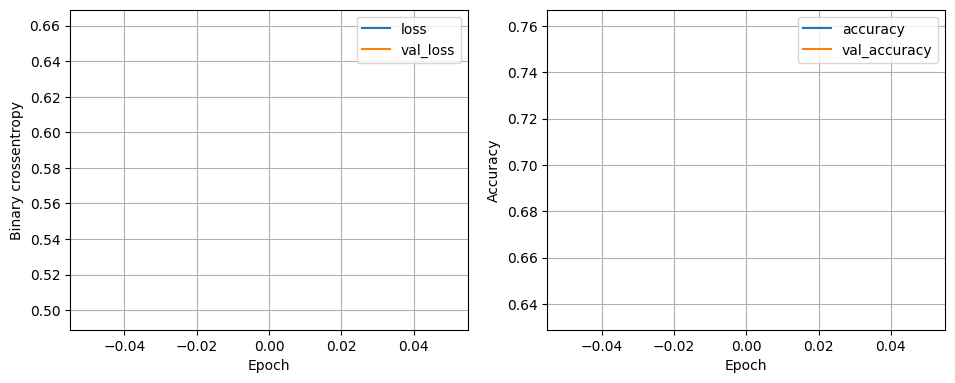

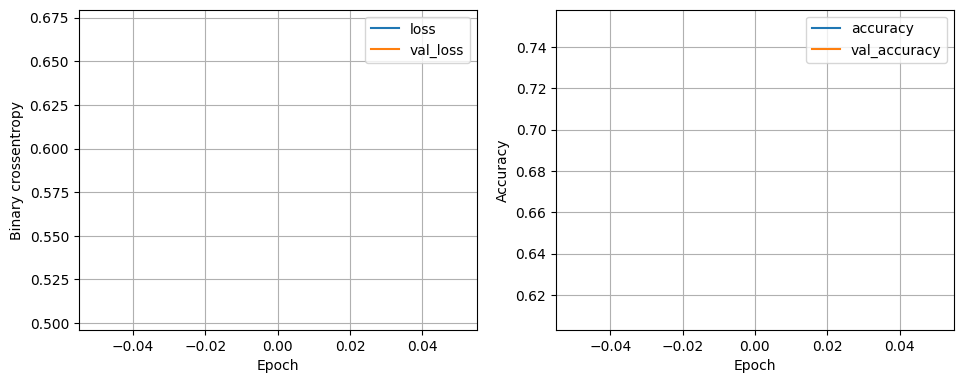

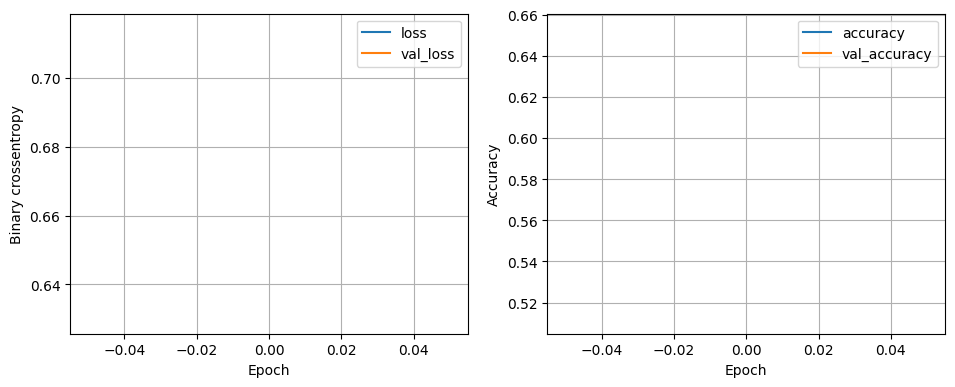

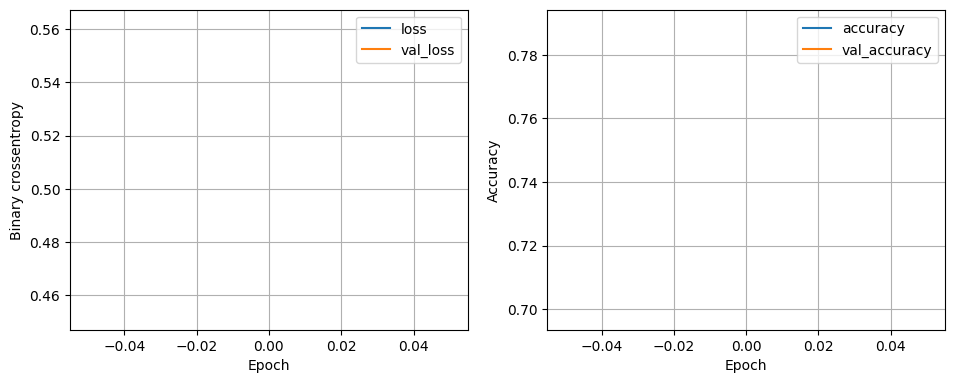

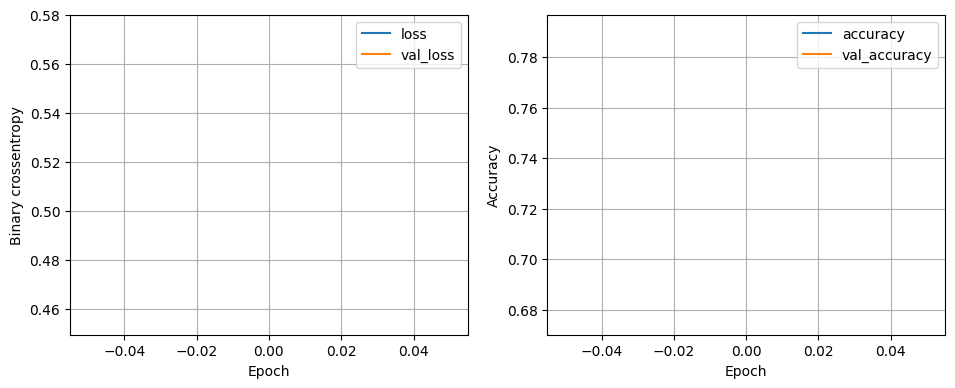

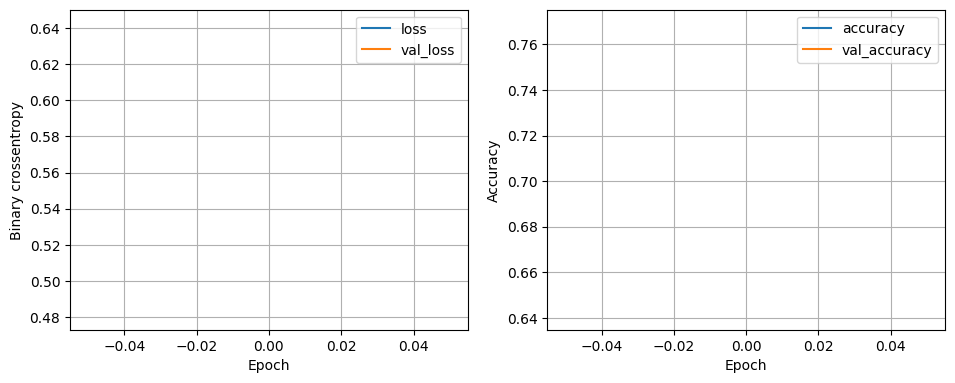

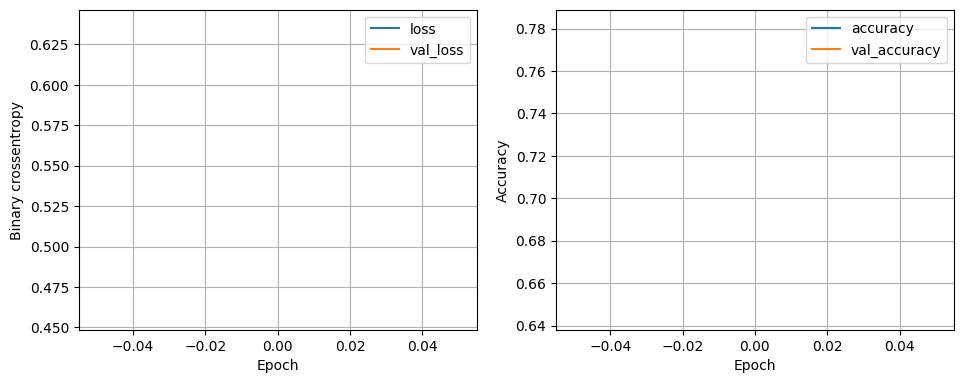

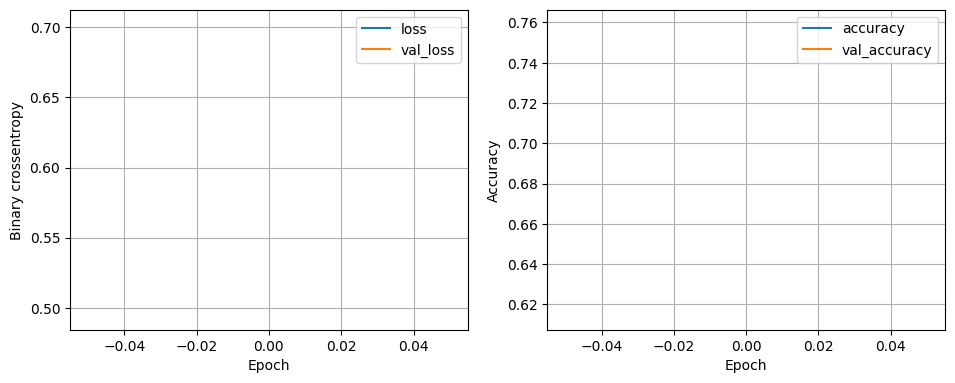

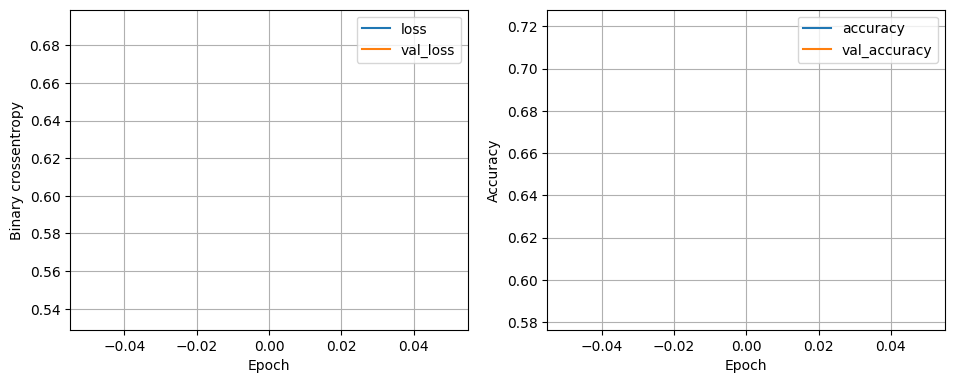

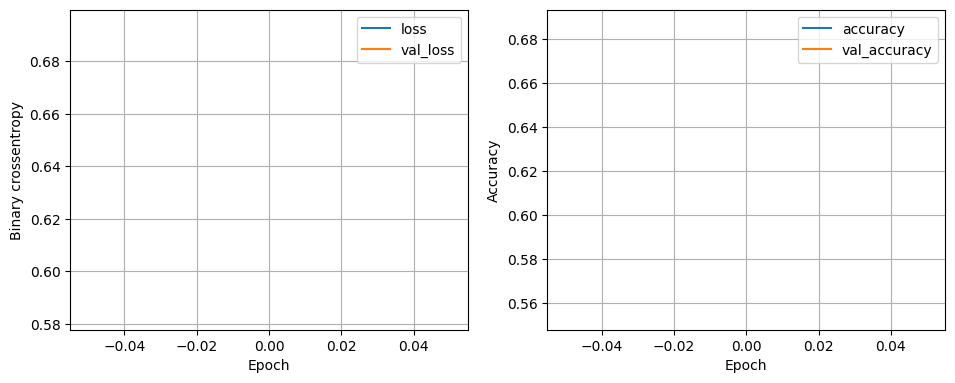

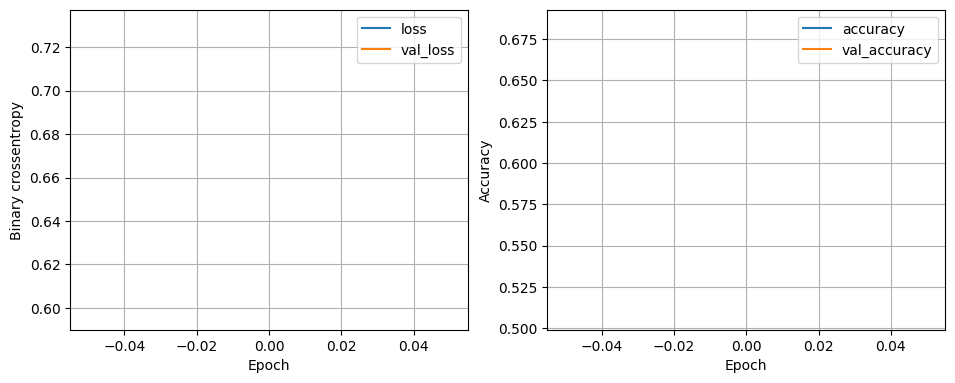

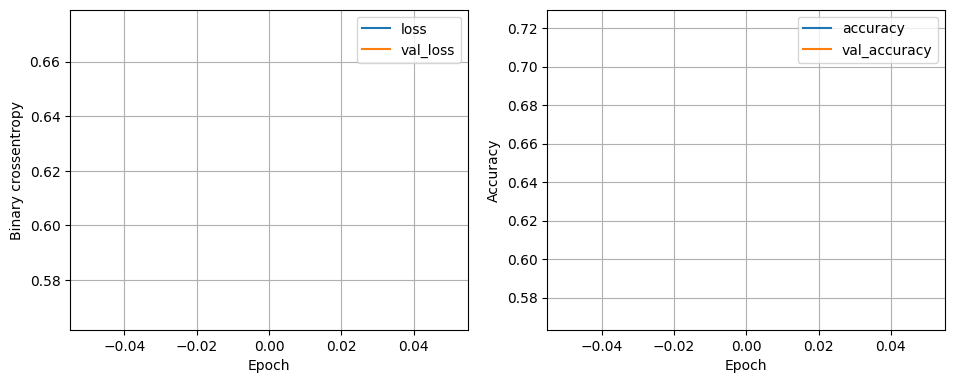

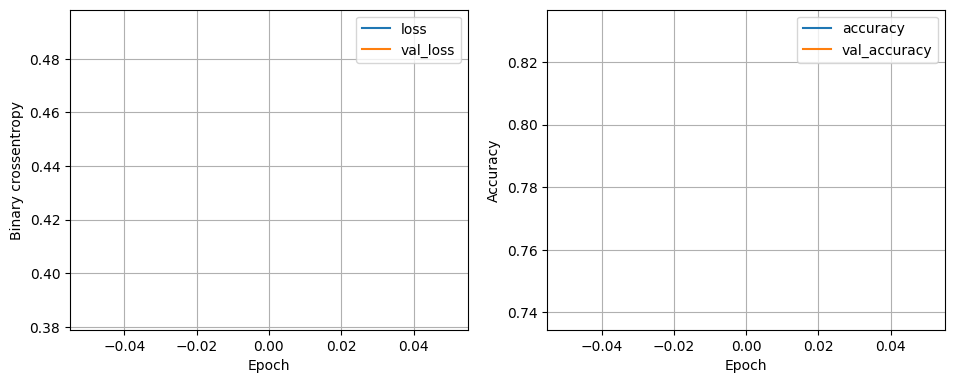

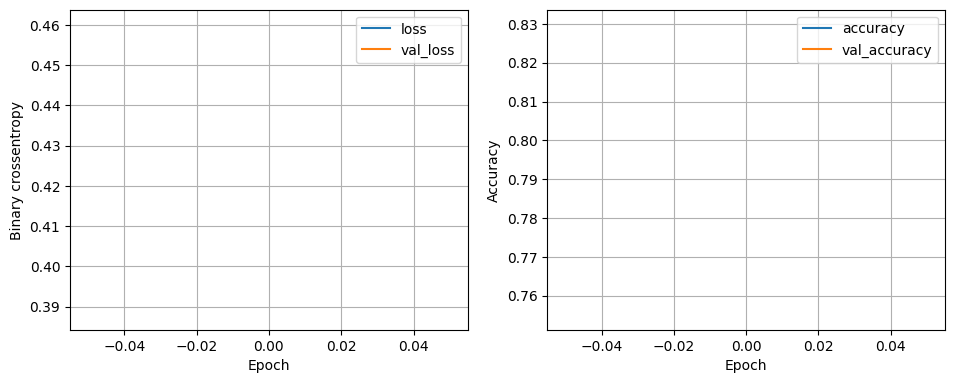

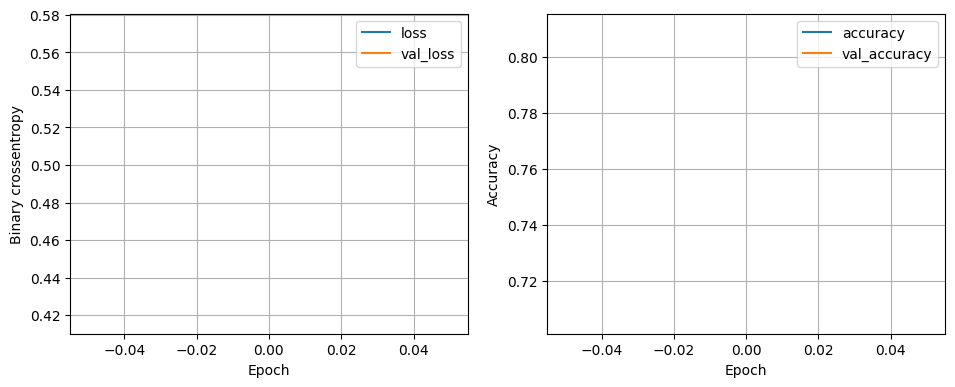

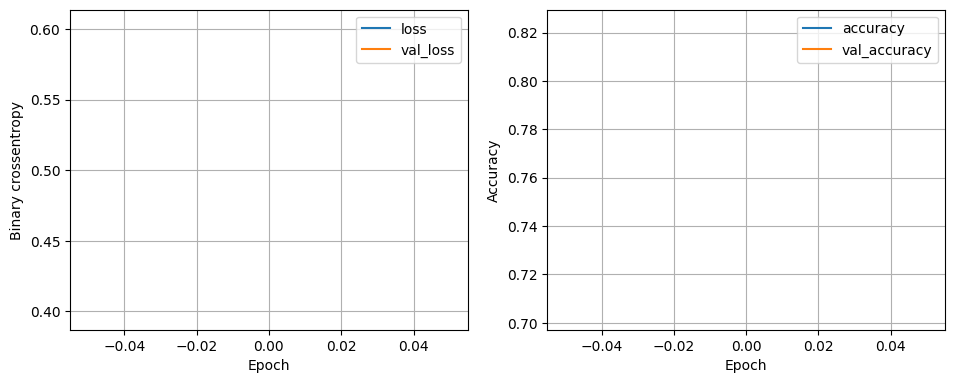

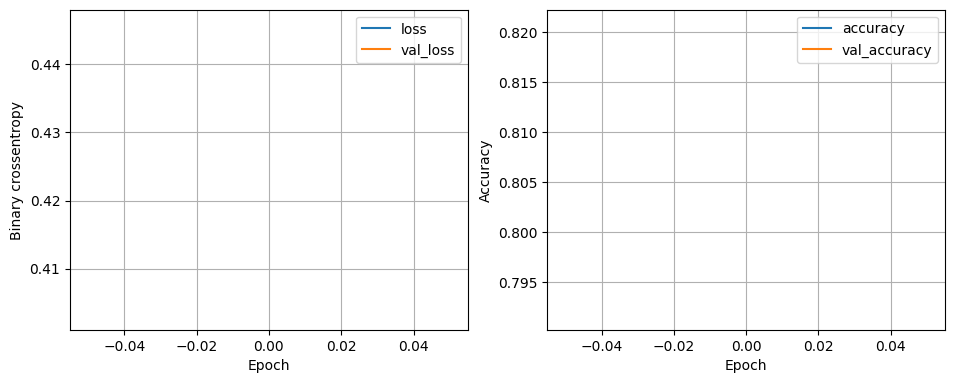

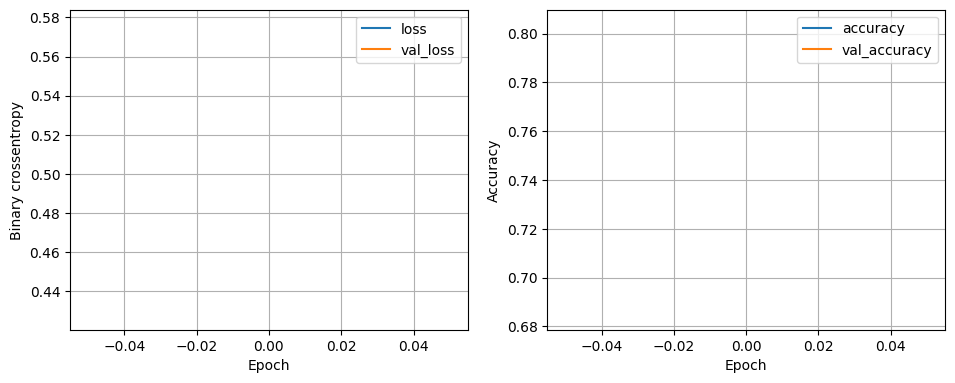

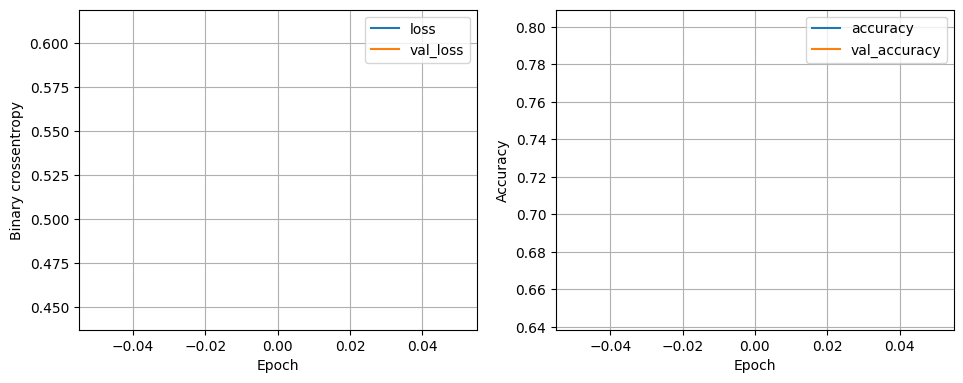

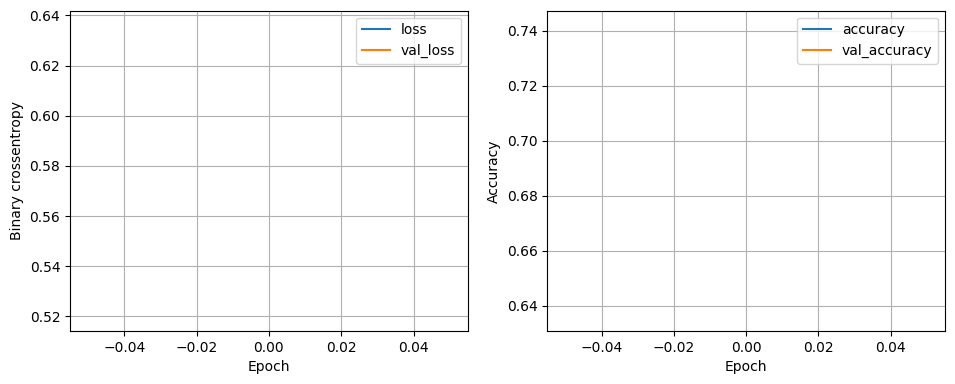

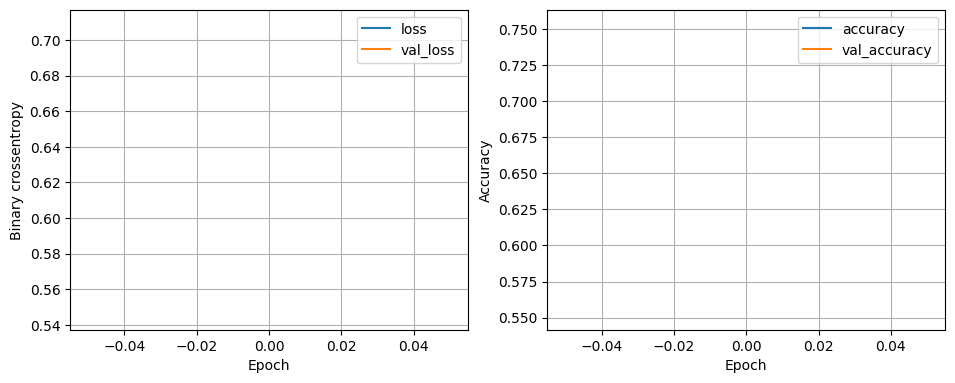

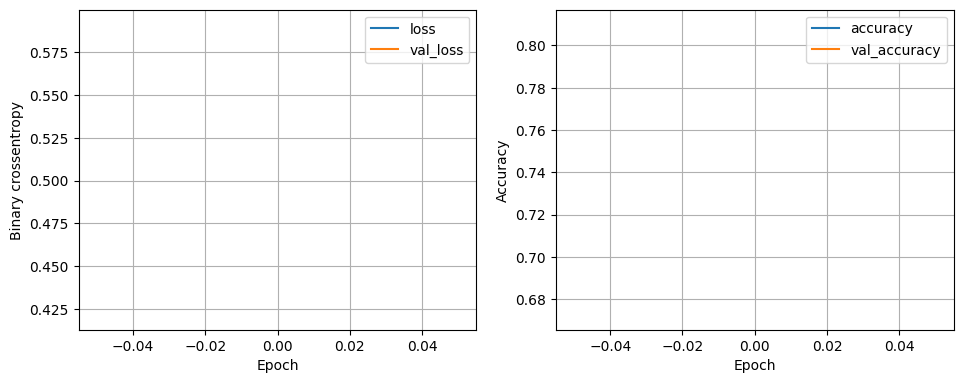

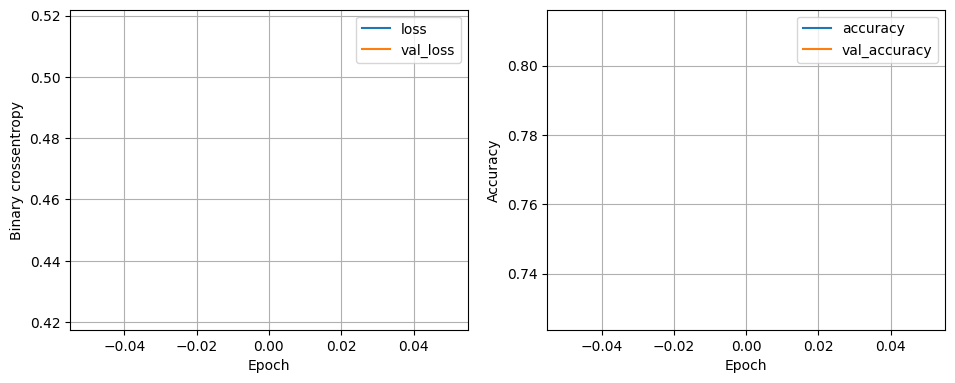

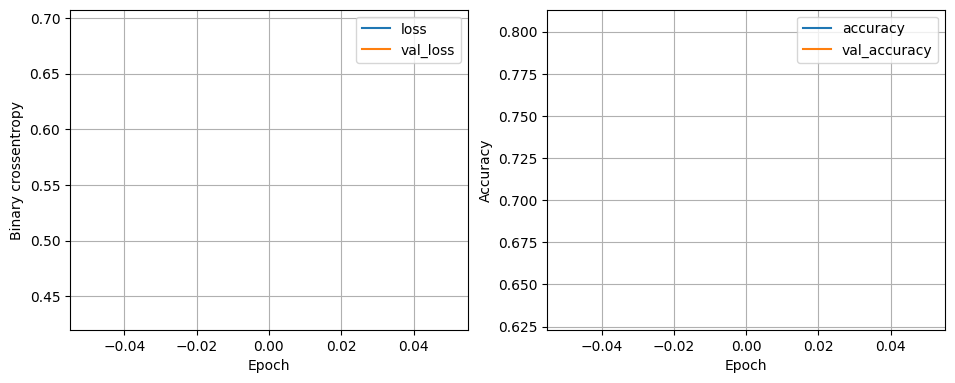

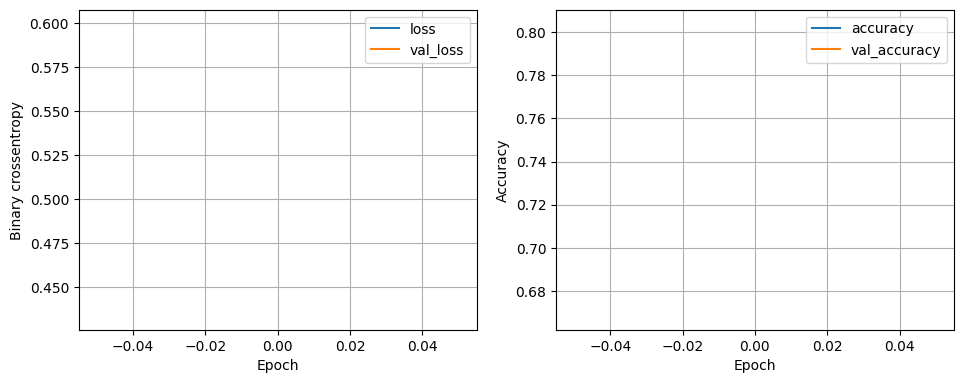

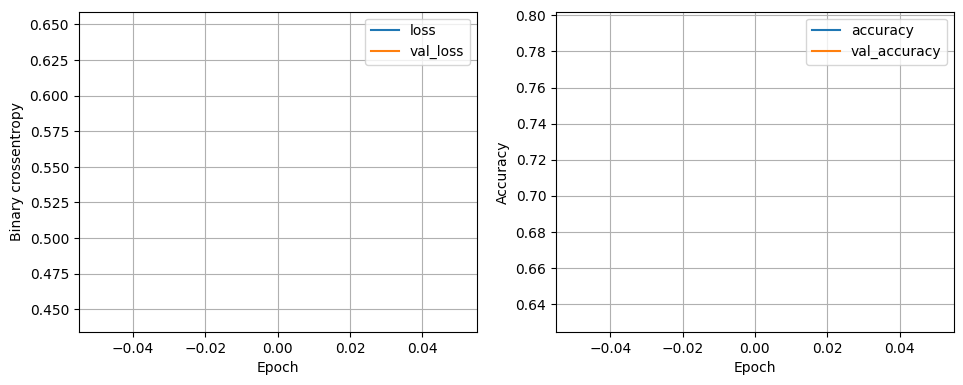

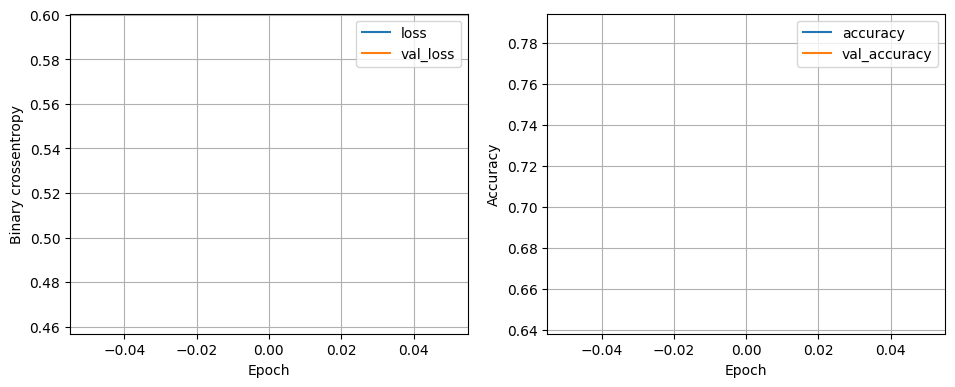

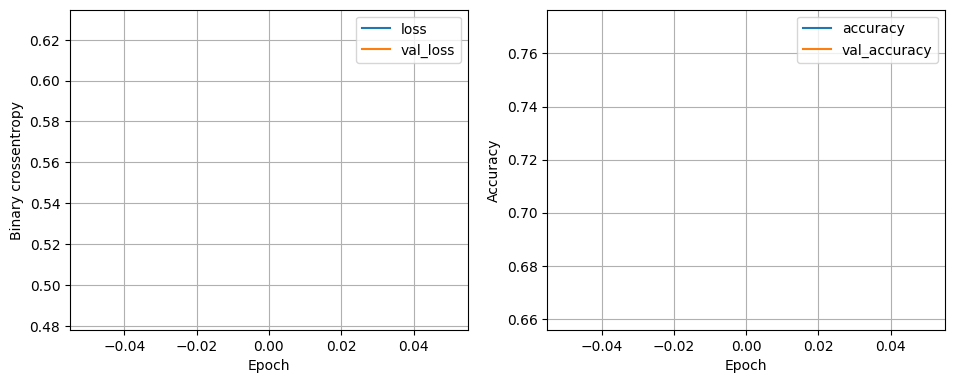

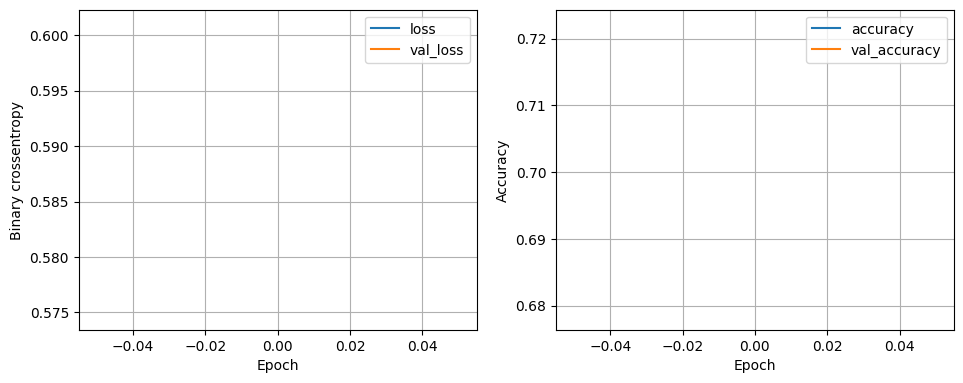

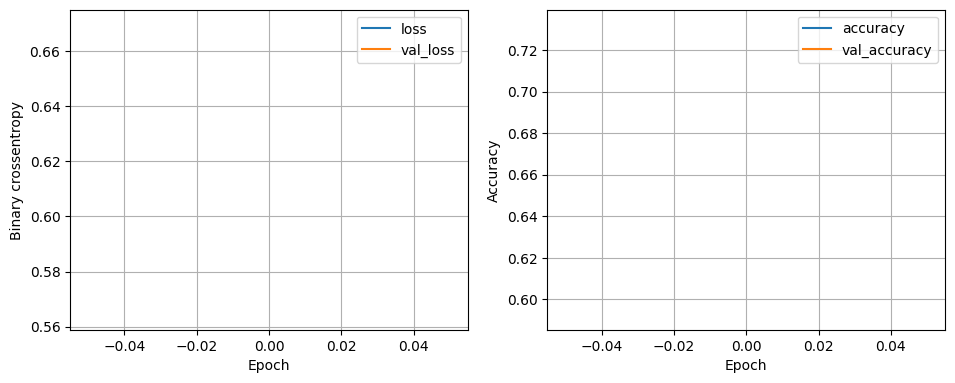

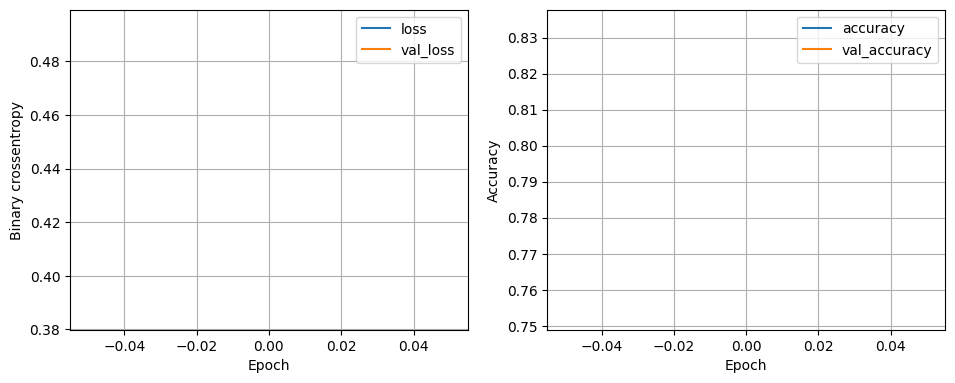

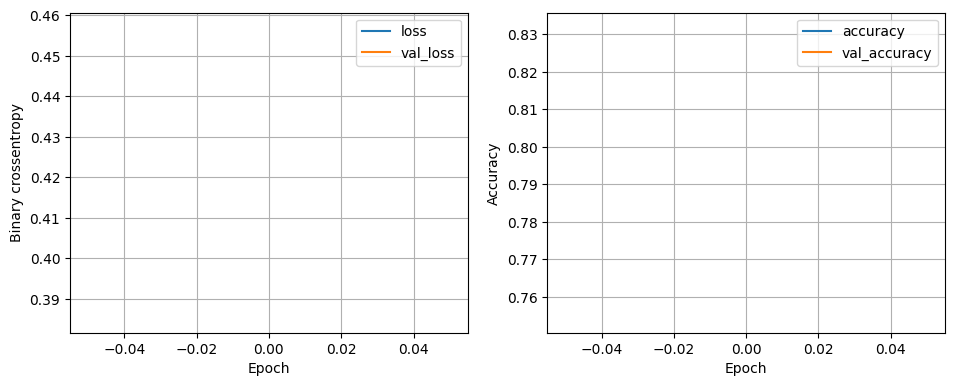

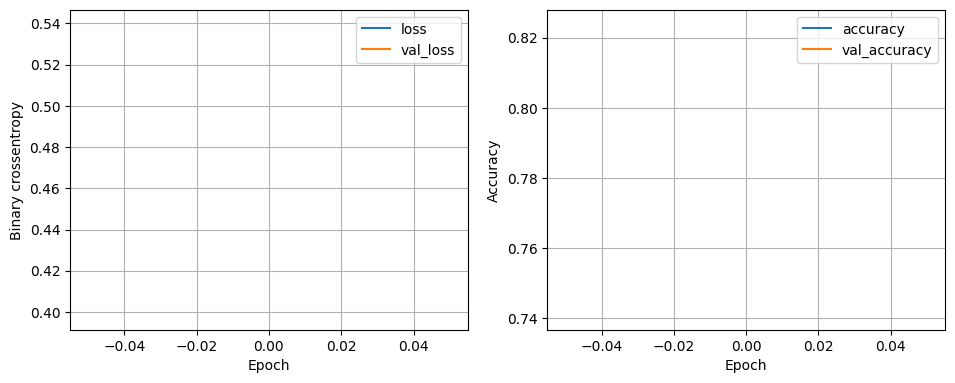

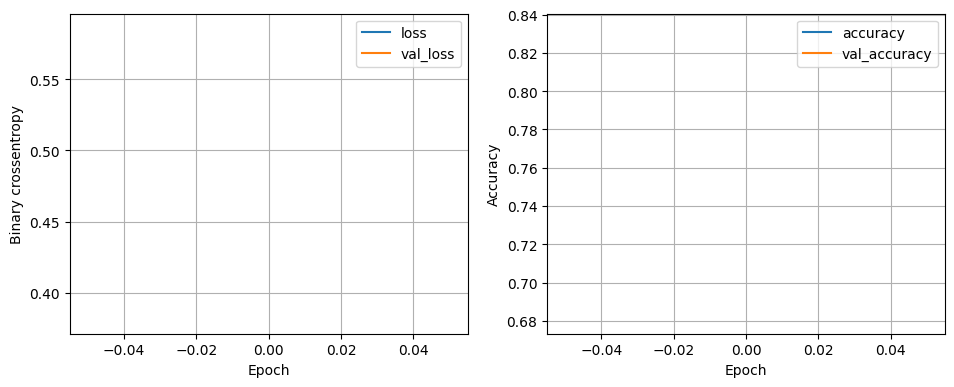

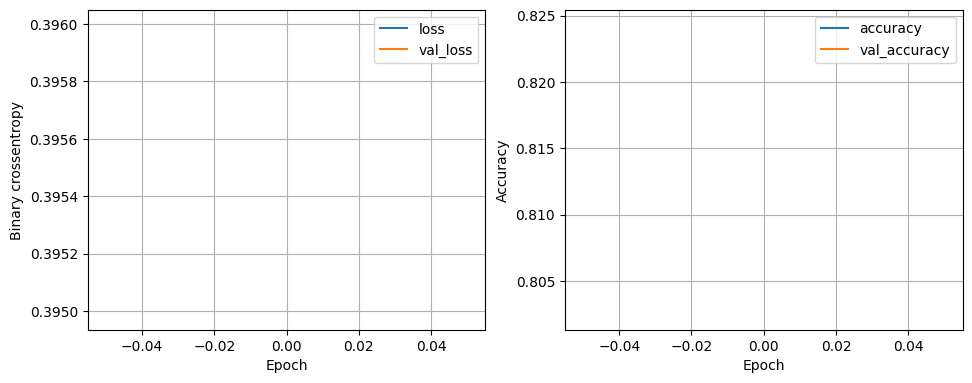

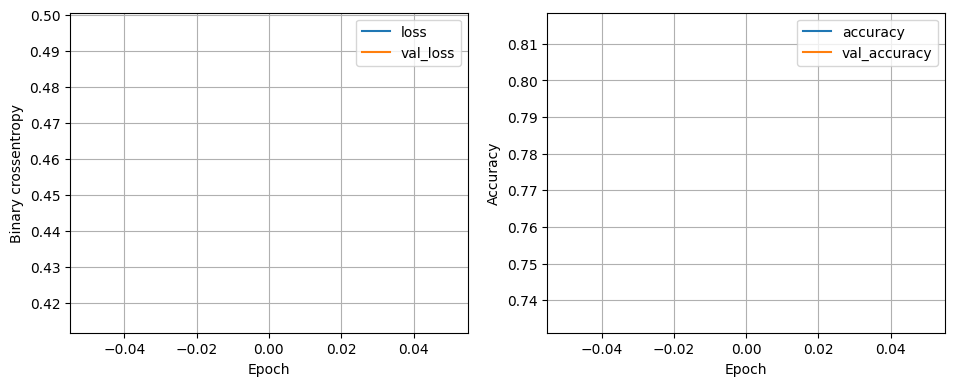

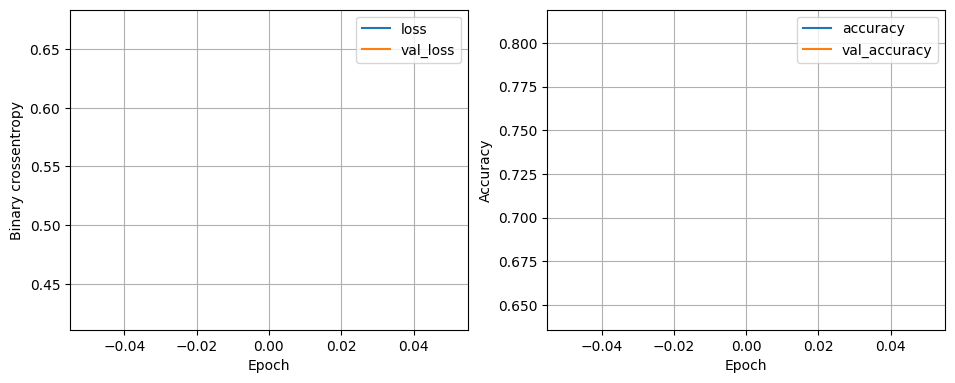

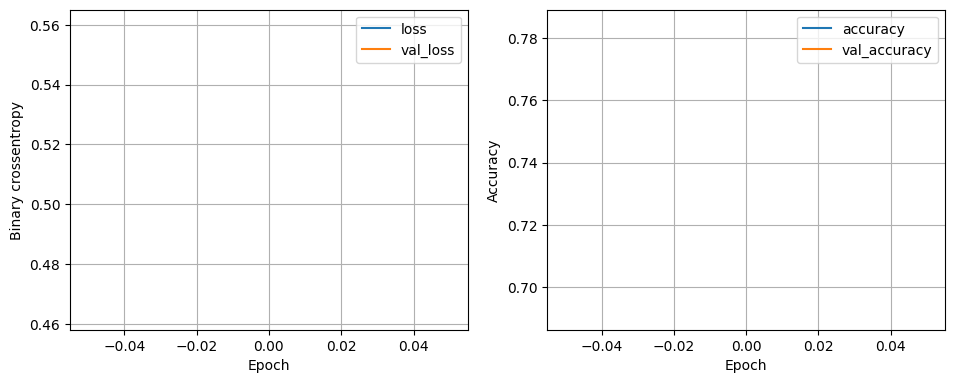

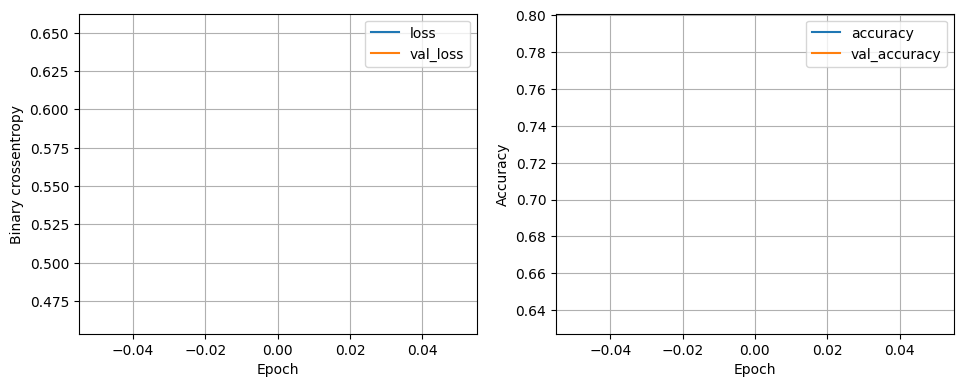

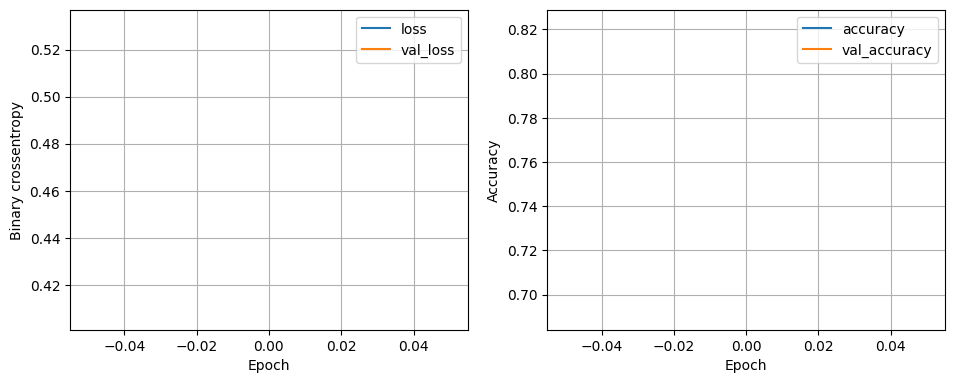

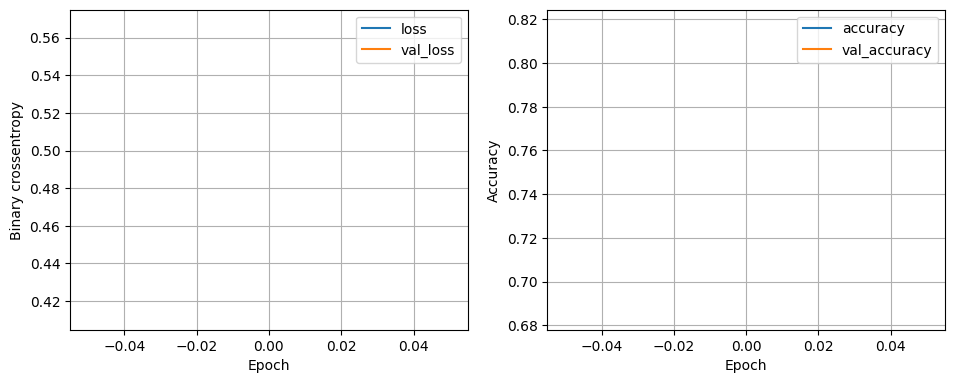

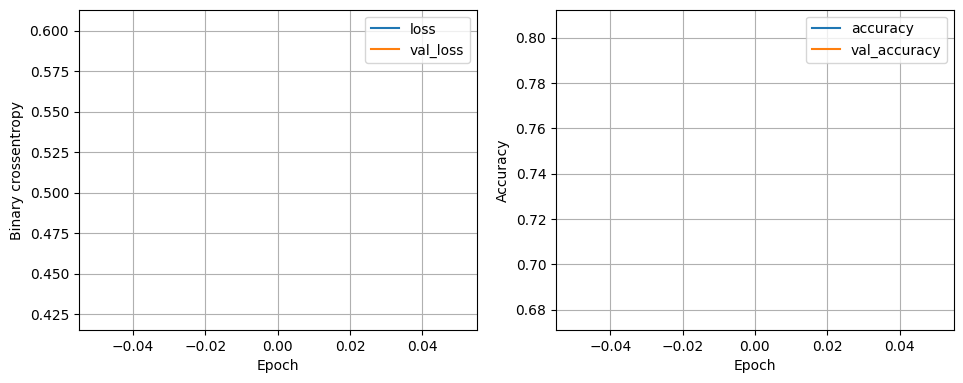

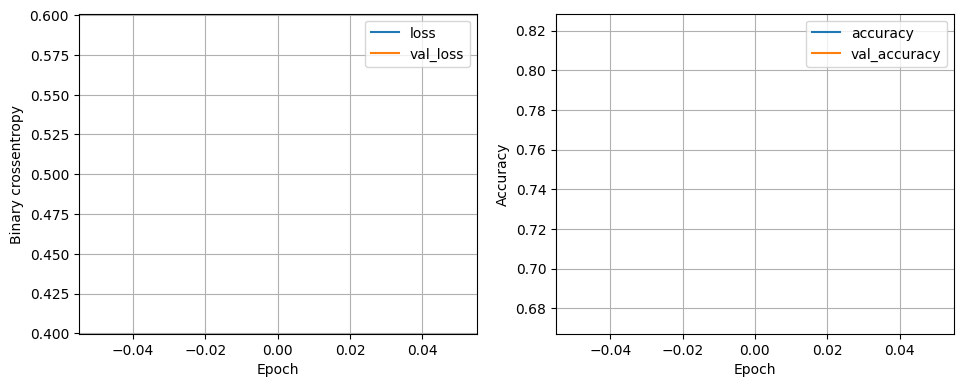

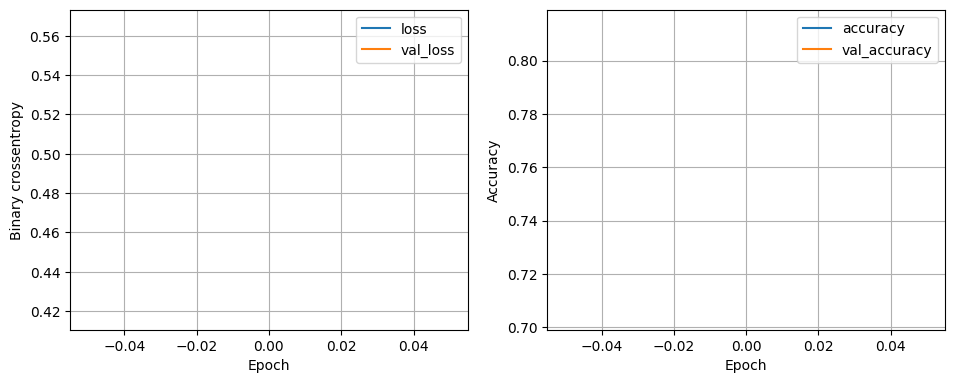

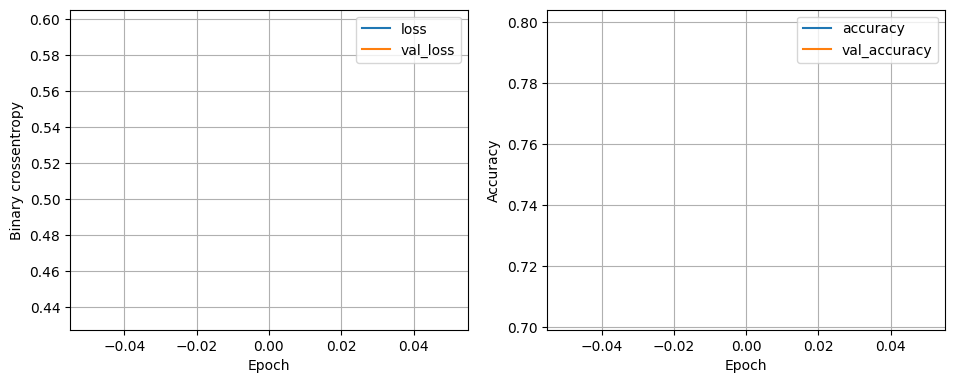

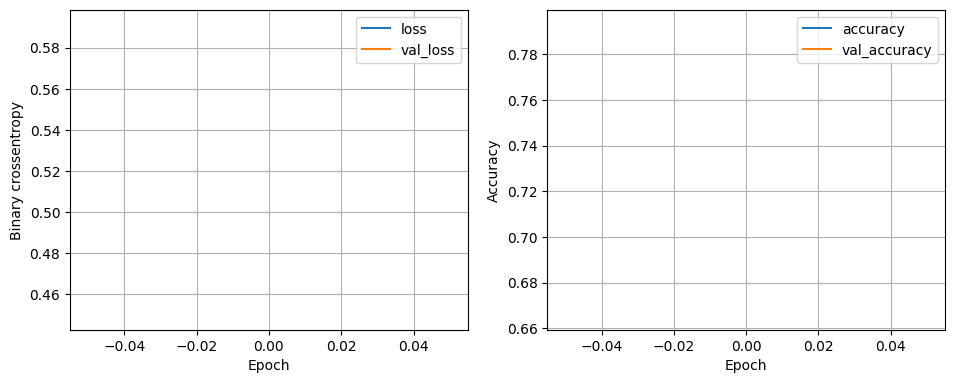

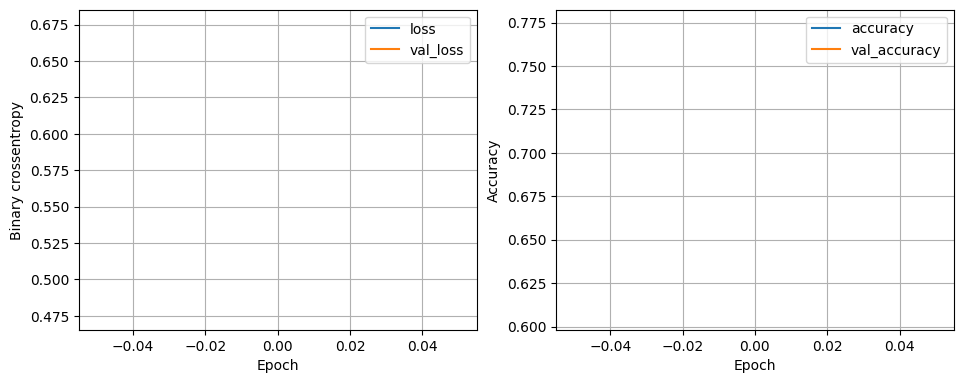

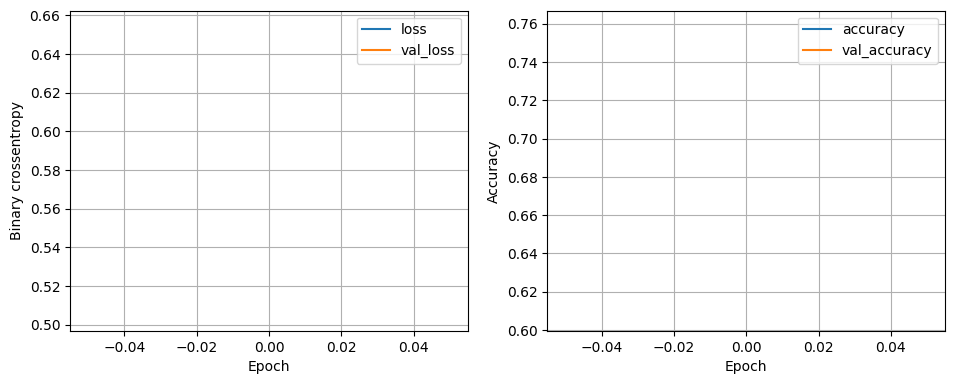

In [23]:
least_val_loss = float('inf')
least_loss_model = None
epochs=1
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid,y_valid)[0]
        print(val_loss)
        print(least_val_loss)
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [24]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 0s 2ms/step


array([1, 0, 1, ..., 1, 1, 1])

In [25]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1361
           1       0.85      0.95      0.90      2443

    accuracy                           0.86      3804
   macro avg       0.87      0.83      0.84      3804
weighted avg       0.87      0.86      0.86      3804



# fcc-bike-regression

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

Dataset : Seoul bike sharing demand [link dataset](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)

In [27]:
dataset_cols = ["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]

In [28]:
df = pd.read_csv("/content/drive/MyDrive/Colab/dataset/SeoulBikeData.csv", encoding='unicode_escape')
df = df.drop(["Date","Holiday","Seasons"],axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [29]:
df.columns = dataset_cols
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [30]:
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop(["hour"],axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


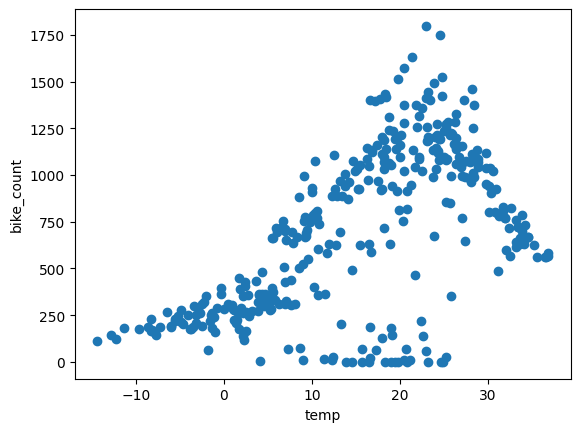

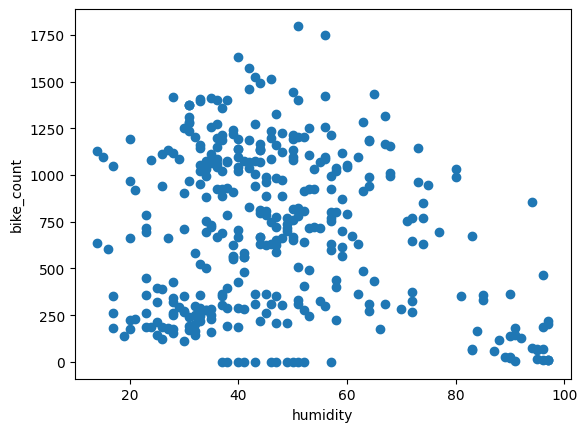

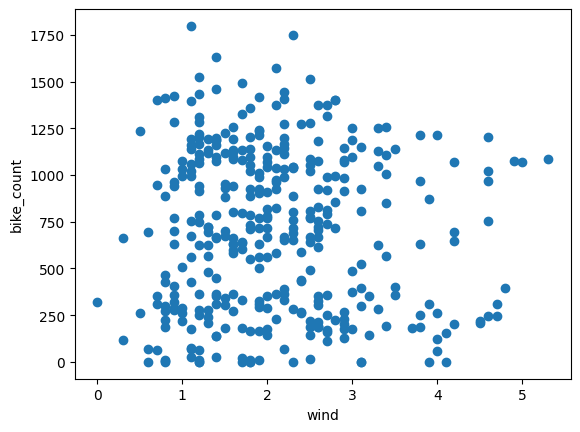

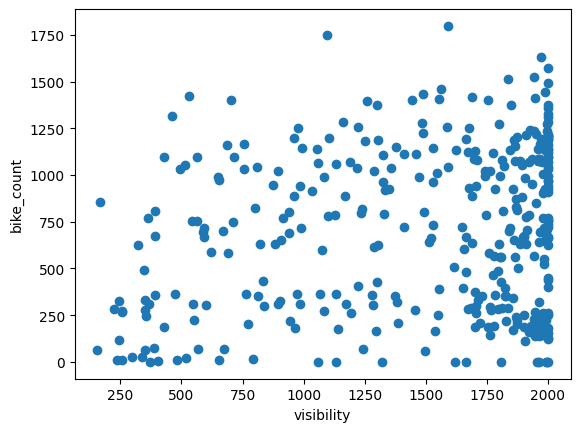

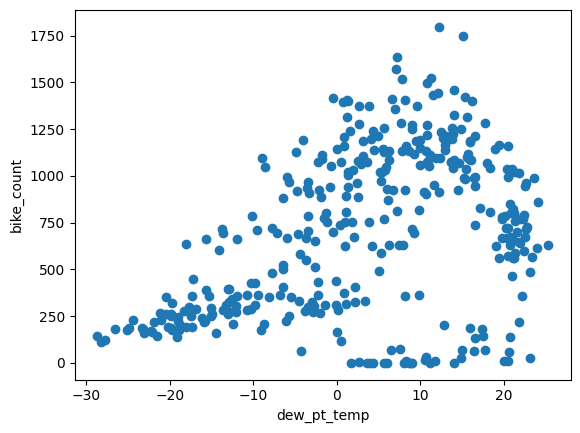

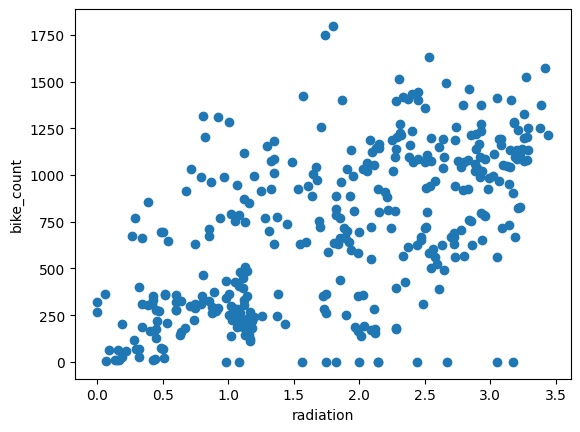

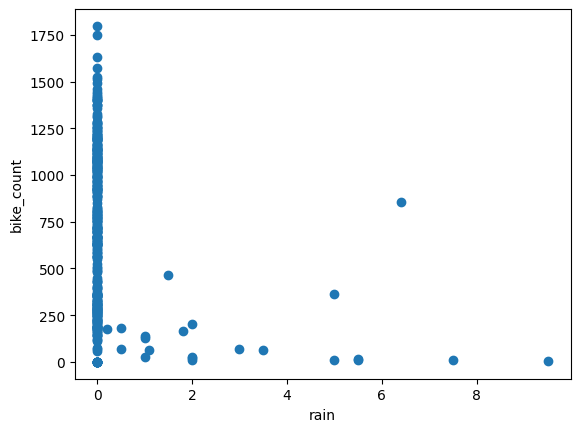

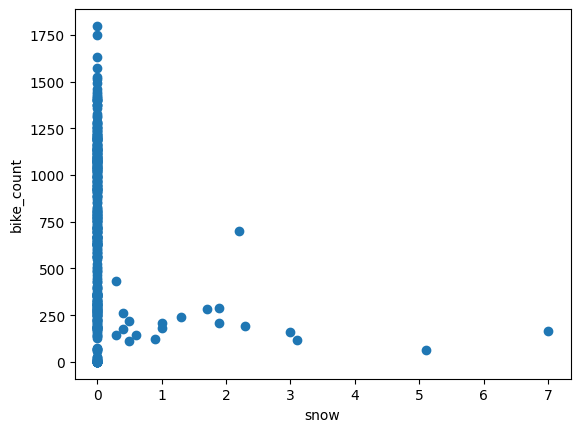

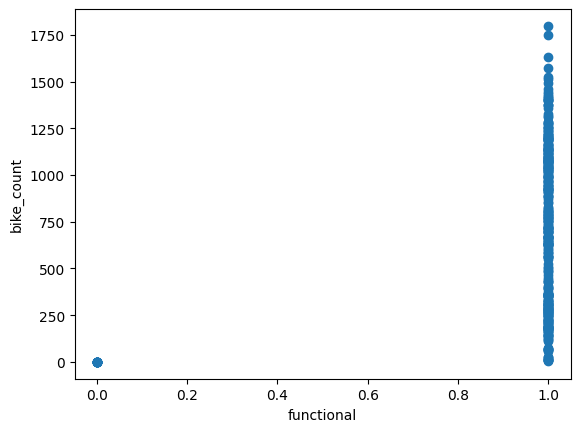

In [31]:
for label in df.columns[1:]:
  plt.scatter(df[label],df['bike_count'])
  plt.xlabel(label)
  plt.ylabel("bike_count")
  plt.grid
  plt.show()

In [32]:
df = df.drop(["wind","visibility","functional"],axis = 1)

In [33]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/valid/test dataset

In [34]:
train, val, test = np.split(df.sample(frac=1),[int(len(df) * 0.6),int(len(df) * 0.8)])

In [35]:
def get_xy(dataframe,y_label,x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if  x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y

In [36]:
_, X_train_temp, y_train_temp = get_xy(train,"bike_count",x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val,"bike_count",x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test,"bike_count",x_labels=["temp"])

In [37]:
print(X_train_temp.shape)
print(y_train_temp.shape)

(219, 1)
(219, 1)


In [38]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [39]:
print(temp_reg.coef_,temp_reg.intercept_)

[[20.84540772]] [367.12184444]


In [40]:
temp_reg.score(X_test_temp,y_test_temp)

0.288258673161372

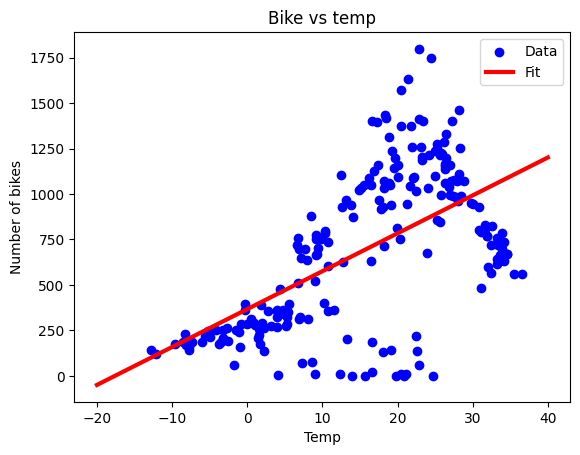

In [41]:
plt.scatter(X_train_temp,y_train_temp,label='Data',color='blue')
x = tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth=3)
plt.legend()
plt.title("Bike vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Multiple linear Regression

In [42]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [43]:
_, X_train_all, y_train_all = get_xy(train,"bike_count",x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val,"bike_count",x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test,"bike_count",x_labels=df.columns[1:])

In [44]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [45]:
all_reg.score(X_test_all,y_test_all)

0.44579103903509854

# Regression with Neural Net

In [46]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show

In [47]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [48]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [49]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [50]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp, verbose=0, epochs=1000,validation_data = (X_val_temp,y_val_temp)
)

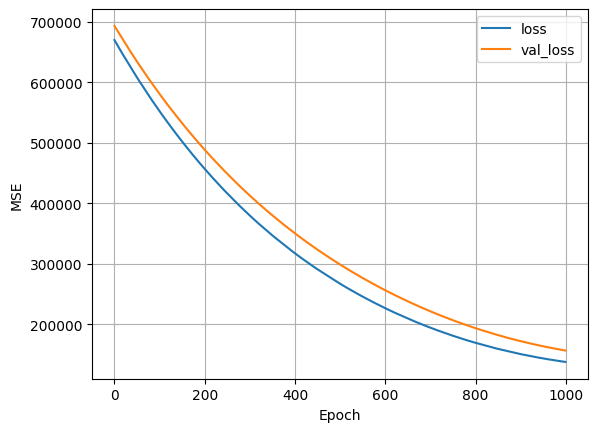

In [51]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


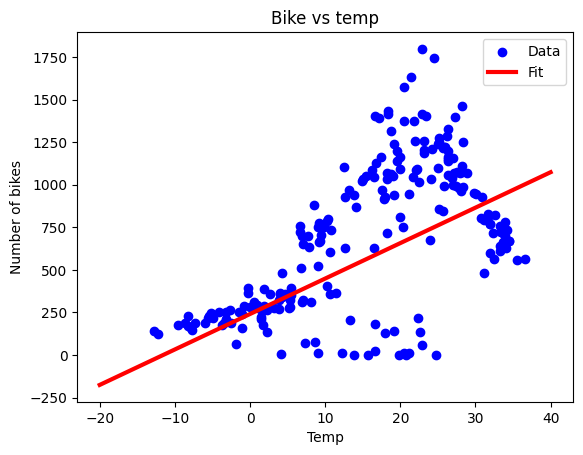

In [52]:
plt.scatter(X_train_temp,y_train_temp,label='Data',color='blue')
x = tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth=3)
plt.legend()
plt.title("Bike vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Neural Net

In [53]:
# temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
# temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu'),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [54]:
history = nn_model.fit(
    X_train_temp,
    y_train_temp,
    validation_data = (X_val_temp,y_val_temp),
    verbose = 0,epochs = 100,
)

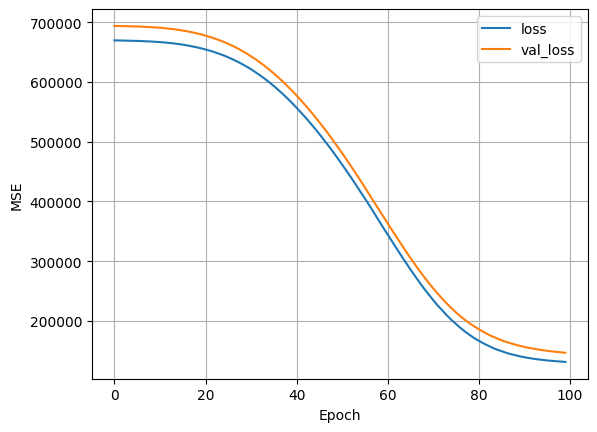

In [55]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


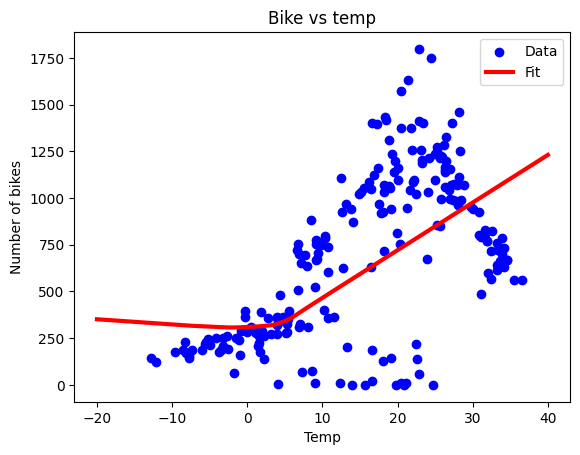

In [56]:
plt.scatter(X_train_temp,y_train_temp,label='Data',color='blue')
x = tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth=3)
plt.legend()
plt.title("Bike vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [57]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,1),axis=None)
all_normalizer.adapt(X_train_temp.reshape(-1))

In [58]:

nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [59]:
history = nn_model.fit(
    X_train_all,
    y_train_all,
    validation_data = (X_val_all,y_val_all),
    verbose = 0,epochs = 100
)

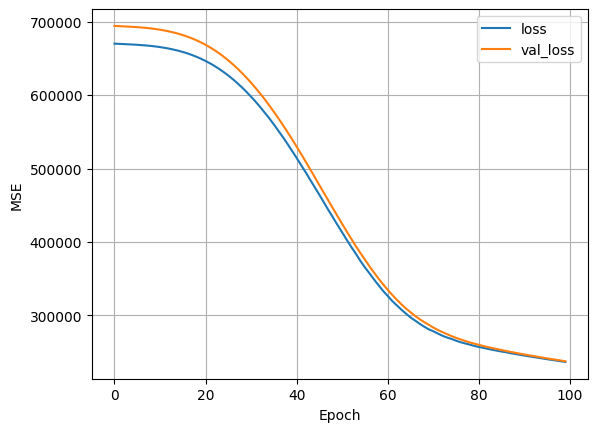

In [60]:
plot_loss(history)